In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Python/мдс/2lab1/train.csv')

In [3]:
df['Cabin'] = df['Cabin'].fillna('M')
Deck = []
for i in range(len(df.axes[0])):
  Deck.append(df['Cabin'][i][0])
df = df.assign(Deck = Deck)

In [4]:
df = df.assign(Binned_Age = pd.qcut(df['Age'], q = 10))
df = df.assign(Binned_fare = pd.qcut(df['Fare'], q = 13))

In [5]:
temp = df.SibSp + df.Parch + 1
for i in range(len(temp)):
  if (temp[i] == 1): temp[i] = 'alone'
  if (temp[i] == 2 or temp[i] == 3 or temp[i] == 4): temp[i] = 'small'
  if (temp[i] == 5 or temp[i] == 6): temp[i] = 'medium'
  if (temp[i] == 7 or temp[i] == 8 or temp[i] == 11): temp[i] = 'large'
df = df.assign(Family_Size = temp)

df = df.assign(Ticket_Frequency = df.groupby('Ticket')['Ticket'].transform('count'))

In [6]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [7]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

<ipython-input-7-0c85a8019a59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1


In [8]:
df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [9]:
df.count(axis=0)

PassengerId         891
Survived            891
Pclass              891
Name                891
Sex                 891
Age                 714
SibSp               891
Parch               891
Ticket              891
Fare                891
Cabin               891
Embarked            889
Deck                891
Binned_Age          714
Binned_fare         891
Family_Size         891
Ticket_Frequency    891
Title               891
Is_Married          891
dtype: int64

In [10]:
df = df.fillna(df.median(axis=0), axis=0)

<ipython-input-10-e477291322f6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median(axis=0), axis=0)


In [11]:
df['Embarked'] = df['Embarked'].fillna('S')

In [12]:
df.count(axis=0)

PassengerId         891
Survived            891
Pclass              891
Name                891
Sex                 891
Age                 891
SibSp               891
Parch               891
Ticket              891
Fare                891
Cabin               891
Embarked            891
Deck                891
Binned_Age          714
Binned_fare         891
Family_Size         891
Ticket_Frequency    891
Title               891
Is_Married          891
dtype: int64

In [13]:
df = df.set_index('PassengerId')

In [14]:
data_age = pd.get_dummies(df['Binned_Age'])
data_fare = pd.get_dummies(df['Binned_fare'])
df = pd.concat((df, data_age, data_fare), axis=1)
df = df.drop('Binned_Age', axis=1)
df = df.drop('Binned_fare', axis=1)
df = df.drop('Fare', axis=1)
df = df.drop('Age', axis=1)

In [15]:
y_train = df['Survived'].values
df = df.drop('Survived', axis=1)

categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns = df.mode(numeric_only=True).columns.values.tolist()
categorical_columns.remove('Cabin')

print(categorical_columns)
print(numerical_columns)

['Name', 'Sex', 'Ticket', 'Embarked', 'Deck', 'Family_Size', 'Title']
['Pclass', 'SibSp', 'Parch', 'Ticket_Frequency', 'Is_Married', Interval(0.419, 14.0, closed='right'), Interval(14.0, 19.0, closed='right'), Interval(19.0, 22.0, closed='right'), Interval(22.0, 25.0, closed='right'), Interval(25.0, 28.0, closed='right'), Interval(28.0, 31.8, closed='right'), Interval(31.8, 36.0, closed='right'), Interval(36.0, 41.0, closed='right'), Interval(41.0, 50.0, closed='right'), Interval(50.0, 80.0, closed='right'), Interval(-0.001, 7.229, closed='right'), Interval(7.229, 7.75, closed='right'), Interval(7.75, 7.896, closed='right'), Interval(7.896, 8.05, closed='right'), Interval(8.05, 10.5, closed='right'), Interval(10.5, 13.0, closed='right'), Interval(13.0, 15.85, closed='right'), Interval(15.85, 24.0, closed='right'), Interval(24.0, 26.55, closed='right'), Interval(26.55, 33.308, closed='right'), Interval(33.308, 55.9, closed='right'), Interval(55.9, 83.158, closed='right'), Interval(83.15

In [16]:
data_describe = df.describe(include=[object])
for c in categorical_columns:
  df[c] = df[c].fillna(data_describe[c]['top'])

In [17]:
binary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if
data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Name', 'Ticket', 'Embarked', 'Deck', 'Family_Size', 'Title']


In [18]:
df['Sex'] = df['Sex'].replace('male', 1)
df['Sex'] = df['Sex'].replace('female', 0)

In [19]:
data_nonbinary = pd.get_dummies(df['Embarked'])
nonbinary_columns.remove('Name')
nonbinary_columns.remove('Ticket')

In [20]:
data_numerical = df[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,Pclass,SibSp,Parch,Ticket_Frequency,Is_Married,"(0.419, 14.0]","(14.0, 19.0]","(19.0, 22.0]","(22.0, 25.0]","(25.0, 28.0]",...,"(7.896, 8.05]","(8.05, 10.5]","(10.5, 13.0]","(13.0, 15.85]","(15.85, 24.0]","(24.0, 26.55]","(26.55, 33.308]","(33.308, 55.9]","(55.9, 83.158]","(83.158, 512.329]"
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,...,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-7.575933e-17,3.588600e-17,4.585433e-17,-2.791133e-17,-5.980999e-18,4.386066e-17,2.591766e-17,-1.993666e-17,1.993666e-18,8.373399e-17,...,3.787966e-17,-2.193033e-17,5.980999e-17,8.174033e-17,-1.594933e-17,6.379733e-17,3.987333e-18,1.993666e-18,-4.685116e-17,-5.582266e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.565228e+00,-4.742788e-01,-4.734077e-01,-5.788367e-01,-4.037353e-01,-3.073897e-01,-3.287666e-01,-2.849902e-01,-2.918325e-01,-2.709456e-01,...,-2.733221e-01,-3.095695e-01,-2.803644e-01,-2.538577e-01,-2.849902e-01,-2.985664e-01,-2.756838e-01,-2.918325e-01,-2.872835e-01,-2.872835e-01
25%,-3.691575e-01,-4.742788e-01,-4.734077e-01,-5.788367e-01,-4.037353e-01,-3.073897e-01,-3.287666e-01,-2.849902e-01,-2.918325e-01,-2.709456e-01,...,-2.733221e-01,-3.095695e-01,-2.803644e-01,-2.538577e-01,-2.849902e-01,-2.985664e-01,-2.756838e-01,-2.918325e-01,-2.872835e-01,-2.872835e-01
50%,8.269128e-01,-4.742788e-01,-4.734077e-01,-5.788367e-01,-4.037353e-01,-3.073897e-01,-3.287666e-01,-2.849902e-01,-2.918325e-01,-2.709456e-01,...,-2.733221e-01,-3.095695e-01,-2.803644e-01,-2.538577e-01,-2.849902e-01,-2.985664e-01,-2.756838e-01,-2.918325e-01,-2.872835e-01,-2.872835e-01
75%,8.269128e-01,4.325504e-01,-4.734077e-01,1.558406e-01,-4.037353e-01,-3.073897e-01,-3.287666e-01,-2.849902e-01,-2.918325e-01,-2.709456e-01,...,-2.733221e-01,-3.095695e-01,-2.803644e-01,-2.538577e-01,-2.849902e-01,-2.985664e-01,-2.756838e-01,-2.918325e-01,-2.872835e-01,-2.872835e-01
max,8.269128e-01,6.780355e+00,6.970233e+00,3.829227e+00,2.474090e+00,3.249548e+00,3.038257e+00,3.504954e+00,3.422778e+00,3.686636e+00,...,3.654581e+00,3.226667e+00,3.562784e+00,3.934794e+00,3.504954e+00,3.345580e+00,3.623273e+00,3.422778e+00,3.476975e+00,3.476975e+00


In [21]:
df = pd.concat((data_numerical, df[binary_columns], data_nonbinary),axis=1)
df = pd.DataFrame(df, dtype=float)
print(df.shape)
print(df.columns)

(891, 32)
Index([          'Pclass',            'SibSp',            'Parch',
       'Ticket_Frequency',       'Is_Married',      (0.419, 14.0],
             (14.0, 19.0],       (19.0, 22.0],       (22.0, 25.0],
             (25.0, 28.0],       (28.0, 31.8],       (31.8, 36.0],
             (36.0, 41.0],       (41.0, 50.0],       (50.0, 80.0],
          (-0.001, 7.229],      (7.229, 7.75],      (7.75, 7.896],
            (7.896, 8.05],       (8.05, 10.5],       (10.5, 13.0],
            (13.0, 15.85],      (15.85, 24.0],      (24.0, 26.55],
          (26.55, 33.308],     (33.308, 55.9],     (55.9, 83.158],
        (83.158, 512.329],              'Sex',                'C',
                      'Q',                'S'],
      dtype='object')


In [22]:
X_train = df
X_train.columns = X_train.columns.astype(str)
feature_names = X_train.columns
print(feature_names)

Index(['Pclass', 'SibSp', 'Parch', 'Ticket_Frequency', 'Is_Married',
       '(0.419, 14.0]', '(14.0, 19.0]', '(19.0, 22.0]', '(22.0, 25.0]',
       '(25.0, 28.0]', '(28.0, 31.8]', '(31.8, 36.0]', '(36.0, 41.0]',
       '(41.0, 50.0]', '(50.0, 80.0]', '(-0.001, 7.229]', '(7.229, 7.75]',
       '(7.75, 7.896]', '(7.896, 8.05]', '(8.05, 10.5]', '(10.5, 13.0]',
       '(13.0, 15.85]', '(15.85, 24.0]', '(24.0, 26.55]', '(26.55, 33.308]',
       '(33.308, 55.9]', '(55.9, 83.158]', '(83.158, 512.329]', 'Sex', 'C',
       'Q', 'S'],
      dtype='object')


In [23]:
print(X_train.shape)
print(y_train.shape)
N, d = X_train.shape

(891, 32)
(891,)


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [25]:
y_train_pred=model.predict(X_train)

In [26]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.9405162738496072


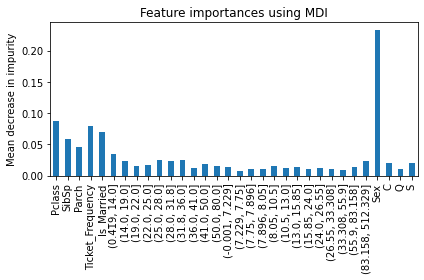

In [27]:
importances = model.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Accuracy: 0.8664421997755332


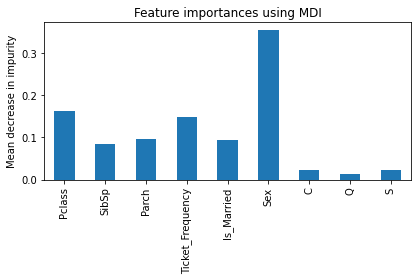

In [28]:
X_train = X_train.drop(columns=['(0.419, 14.0]', '(14.0, 19.0]', '(19.0, 22.0]', '(22.0, 25.0]',
       '(25.0, 28.0]', '(28.0, 31.8]', '(31.8, 36.0]', '(36.0, 41.0]',
       '(41.0, 50.0]', '(50.0, 80.0]', '(-0.001, 7.229]', '(7.229, 7.75]',
       '(7.75, 7.896]', '(7.896, 8.05]', '(8.05, 10.5]', '(10.5, 13.0]',
       '(13.0, 15.85]', '(15.85, 24.0]', '(24.0, 26.55]', '(26.55, 33.308]',
       '(33.308, 55.9]', '(55.9, 83.158]', '(83.158, 512.329]'])

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

importances = model.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Python/мдс/2lab1/test_with_labels.csv')

In [30]:
def data_prep(df):
  df = df.rename({'Sibsp': 'SibSp'}, axis=1)
  df['Cabin'] = df['Cabin'].fillna('M')
  Deck = []
  for i in range(len(df.axes[0])):
    Deck.append(df['Cabin'][i][0])
  df = df.assign(Deck = Deck)

  temp = df.SibSp + df.Parch + 1
  for i in range(len(temp)):
    if (temp[i] == 1): temp[i] = 'alone'
    if (temp[i] == 2 or temp[i] == 3 or temp[i] == 4): temp[i] = 'small'
    if (temp[i] == 5 or temp[i] == 6): temp[i] = 'medium'
    if (temp[i] == 7 or temp[i] == 8 or temp[i] == 11): temp[i] = 'large'
  df = df.assign(Family_Size = temp)

  df = df.assign(Ticket_Frequency = df.groupby('Ticket')['Ticket'].transform('count'))

  df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

  df['Is_Married'] = 0
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

  df['Title'] = df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
  df['Title'] = df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

  df = df.fillna(df.median(axis=0), axis=0)

  df['Embarked'] = df['Embarked'].fillna('S')

  df = df.set_index('Unnamed: 0')

  df = df.drop('Fare', axis=1)
  df = df.drop('Age', axis=1)

  y = df['Survived'].values
  df = df.drop('Survived', axis=1)

  categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
  numerical_columns = df.mode(numeric_only=True).columns.values.tolist()
  categorical_columns.remove('Cabin')

  data_describe = df.describe(include=[object])
  for c in categorical_columns:
    df[c] = df[c].fillna(data_describe[c]['top'])

  binary_columns = [c for c in categorical_columns if
  data_describe[c]['unique'] == 2]
  nonbinary_columns = [c for c in categorical_columns if
  data_describe[c]['unique'] > 2]

  df['Sex'] = df['Sex'].replace('male', 1)
  df['Sex'] = df['Sex'].replace('female', 0)

  data_nonbinary = pd.get_dummies(df['Embarked'])
  nonbinary_columns.remove('Name')
  nonbinary_columns.remove('Ticket')

  data_numerical = df[numerical_columns]
  data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
  data_numerical.describe()

  df = pd.concat((data_numerical, df[binary_columns], data_nonbinary),axis=1)
  
  df = pd.DataFrame(df, dtype=float)

  X = df
  X.columns = X.columns.astype(str)

  return X,y

In [31]:
X_test, y_test = data_prep(data)
y_test_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

<ipython-input-30-97ceea4805c3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
<ipython-input-30-97ceea4805c3>:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median(axis=0), axis=0)


Accuracy: 0.7572115384615384


In [32]:
X_train = X_train.drop(columns = {'C', 'Q', 'S'}, axis=1)
feature_names = X_train.columns

Accuracy: 0.8462401795735129


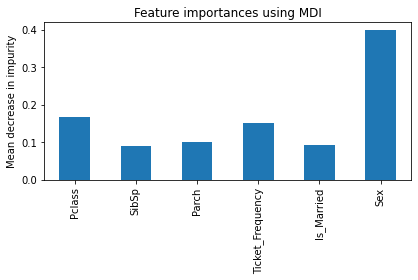

In [33]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

y_train_pred=model2.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

importances = model2.feature_importances_

feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()